In [1]:
#Importing the libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Importing the dataset
path = os.getcwd()
path = path + "\\star_classification.csv"

dataset = pd.read_csv(path)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [3]:
# Changing class from string to int
dataset['class'] = [1 if i == "GALAXY" else 2 if i == "STAR" else 3 for i in dataset["class"]]
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


In [4]:
# Count of each class
class_counts = dataset["class"].value_counts()
print(class_counts)

class
1    59445
2    21594
3    18961
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_23592\4053954700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=dataset, palette="Set2")


<Axes: xlabel='class', ylabel='count'>

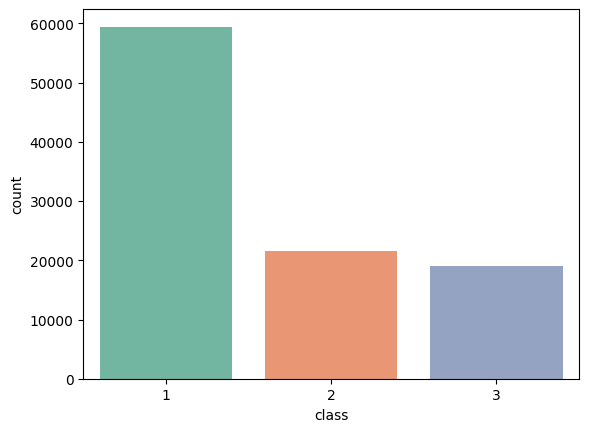

In [5]:
# Plotting the count of each class
sns.countplot(x="class", data=dataset, palette="Set2")

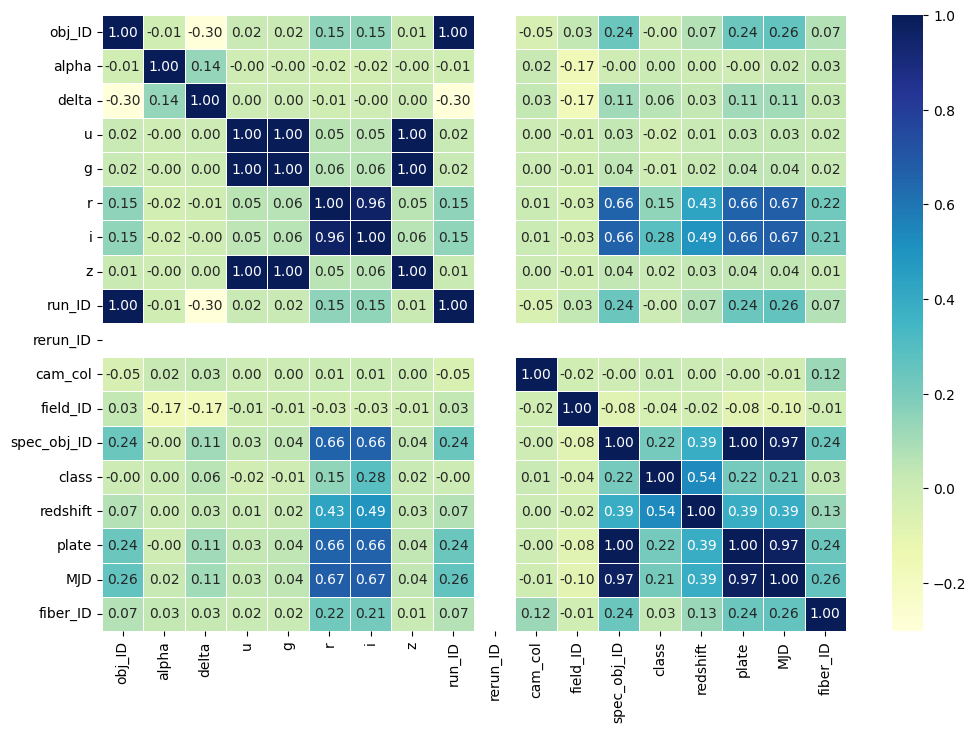

In [6]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [7]:
correlation = dataset.corr()
correlation["class"].sort_values(ascending=False)

class          1.000000
redshift       0.536822
i              0.284396
plate          0.215722
spec_obj_ID    0.215722
MJD            0.207262
r              0.150691
delta          0.056643
fiber_ID       0.032053
z              0.017352
cam_col        0.014476
alpha          0.004552
obj_ID        -0.000047
run_ID        -0.000049
g             -0.005915
u             -0.017701
field_ID      -0.038044
rerun_ID            NaN
Name: class, dtype: float64

In [8]:
# Dropping uneccessary features
dataset = dataset.drop(["rerun_ID"], axis=1)
dataset.info()

#dataset3 = dataset2.drop(["MJD","spec_obj_ID","i","r",""], axis=1)
#dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   cam_col      100000 non-null  int64  
 10  field_ID     100000 non-null  int64  
 11  spec_obj_ID  100000 non-null  float64
 12  class        100000 non-null  int64  
 13  redshift     100000 non-null  float64
 14  plate        100000 non-null  int64  
 15  MJD          100000 non-null  int64  
 16  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 13.0 MB


In [9]:
dataset2 = dataset.drop(["obj_ID","run_ID","field_ID","fiber_ID","cam_col"], axis=1)
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   alpha        100000 non-null  float64
 1   delta        100000 non-null  float64
 2   u            100000 non-null  float64
 3   g            100000 non-null  float64
 4   r            100000 non-null  float64
 5   i            100000 non-null  float64
 6   z            100000 non-null  float64
 7   spec_obj_ID  100000 non-null  float64
 8   class        100000 non-null  int64  
 9   redshift     100000 non-null  float64
 10  plate        100000 non-null  int64  
 11  MJD          100000 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 9.2 MB


In [10]:
dataset3 = dataset2.drop(["alpha", "delta"], axis=1)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u            100000 non-null  float64
 1   g            100000 non-null  float64
 2   r            100000 non-null  float64
 3   i            100000 non-null  float64
 4   z            100000 non-null  float64
 5   spec_obj_ID  100000 non-null  float64
 6   class        100000 non-null  int64  
 7   redshift     100000 non-null  float64
 8   plate        100000 non-null  int64  
 9   MJD          100000 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 7.6 MB


In [11]:
# spec_obj_ID stays since it is unique for each spectral object
dataset4 = dataset3.drop(["plate","MJD"], axis=1)
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   u            100000 non-null  float64
 1   g            100000 non-null  float64
 2   r            100000 non-null  float64
 3   i            100000 non-null  float64
 4   z            100000 non-null  float64
 5   spec_obj_ID  100000 non-null  float64
 6   class        100000 non-null  int64  
 7   redshift     100000 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 6.1 MB


In [12]:
# Deal with imbalanced data
X = dataset4.drop(["class"], axis=1)
y = dataset4['class']

sm = SMOTE(random_state=42)             # random_state for reproducibility
print('Original dataset shape %s' % Counter(y))
X, y = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))


Original dataset shape Counter({1: 59445, 2: 21594, 3: 18961})


Resampled dataset shape Counter({1: 59445, 3: 59445, 2: 59445})


C:\Users\pc\AppData\Local\Temp\ipykernel_23592\1239767217.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


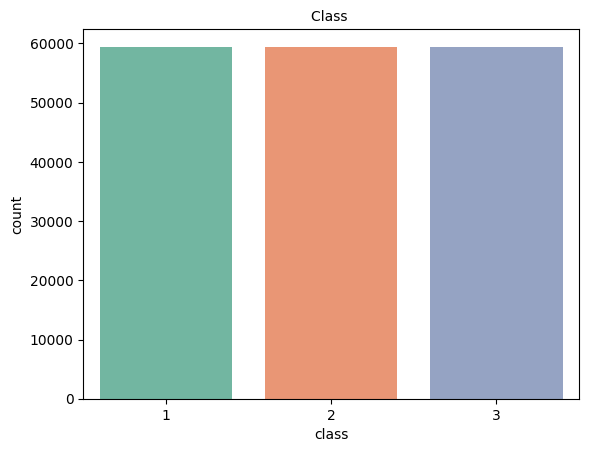

In [13]:
sns.countplot(x=y, palette="Set2")
plt.title("Class ",fontsize=10)
plt.show()

In [14]:
# Feature Scaling
sc = StandardScaler()
X1 = sc.fit_transform(X)


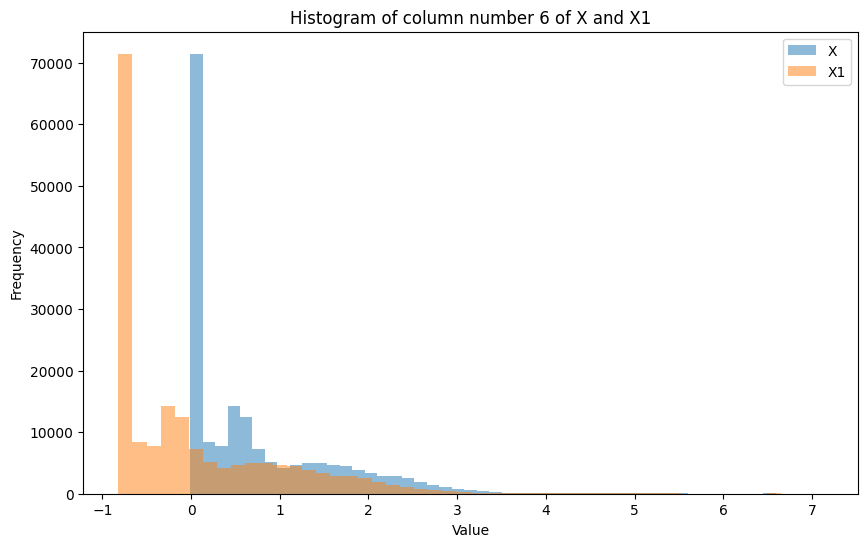

In [15]:
# Checking if data's shape is still the same (which it should be)
column = 6


plt.figure(figsize=(10, 6))
plt.hist(X.iloc[:, column], bins=50, label='X', alpha=0.5)
plt.hist(X1[:, column], bins=50, label='X1', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of column number ' + str(column) + ' of X and X1')
plt.legend()
plt.show()

In [16]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)

# Saving the data
np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)